In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## Parte 2

* O ponto 15o ponto do experimento foi removido pois o valor estava incorreto, era para ser 90o mas apareceu -80o.

In [2]:
p2_1k = pd.read_csv('Parte-2-1kohm_dados.csv')
p2_470 = pd.read_csv('Parte2-470ohms_dados.csv')
p2_2k2 = pd.read_csv('Parte-2-2200ohms_dados.csv')
p3_1u = pd.read_csv('Parte-3-1uF_dados.csv')
p3_2u2 = pd.read_csv('Parte-3-22uF_dados.csv')
p3_8u8 = pd.read_csv('Parte-3-88uF_dados.csv')
p3_0u47 = pd.read_csv('Parte-3-047uF_dados.csv')
p3_47n = pd.read_csv('Parte-3-47nF_dados.csv')

In [3]:
p2_1k.columns

Index(['frequencia (Hz)', 'Vpp1 (V)', 'Vpp2 (V)', 'fase (Ch2-Ch1) (graus)',
       'T', 'T_dB'],
      dtype='object')

In [4]:
# Dados em 100000Hz não condizem com o previsto, a fase de negativo se torna positivo enquanto era previsto que 
# a diferença de fase ficaria em torno de -90o
#p2_470.drop(p2_470.index[[14]], inplace=True)
#p2_1k.drop(p2_1k.index[[14]], inplace=True)
#p2_2k2.drop(p2_2k2.index[[14]], inplace=True)
p2_470

,frequencia (Hz),Vpp1 (V),Vpp2 (V),fase (Ch2-Ch1) (graus),T,T_dB
0,10.000000,3.013798,2.675637,-1.439280,0.788181,-1.033739
1,19.306977,3.519186,3.075770,-1.947450,0.763877,-1.169768
2,37.275937,3.635935,3.237713,-1.608340,0.792948,-1.007555
3,71.968567,3.691870,3.267599,-2.329260,0.783366,-1.060354
4,138.949549,3.703229,3.297763,-5.000000,0.793008,-1.007223
5,268.269580,3.691270,3.247027,-8.497854,0.773785,-1.113799
6,517.947468,3.725772,3.136628,-17.888199,0.708751,-1.495065
7,1000.000000,3.782381,2.837445,-32.203896,0.562761,-2.496757
8,1930.697729,3.980230,2.238502,-50.555553,0.316300,-4.999013
9,3727.593720,4.040546,1.410259,-67.818321,0.121820,-9.142825


In [5]:
p2_470['fase (Ch2-Ch1) (graus)'] = -p2_470['fase (Ch2-Ch1) (graus)']
p2_1k['fase (Ch2-Ch1) (graus)'] = -p2_1k['fase (Ch2-Ch1) (graus)']
p2_2k2['fase (Ch2-Ch1) (graus)'] = -p2_2k2['fase (Ch2-Ch1) (graus)']
#p2_470['T_dB'] = -p2_470['T_dB']
#p2_1k['T_dB'] = -p2_1k['T_dB']
#p2_2k2['T_dB'] = -p2_2k2['T_dB']
p2_470

,frequencia (Hz),Vpp1 (V),Vpp2 (V),fase (Ch2-Ch1) (graus),T,T_dB
0,10.000000,3.013798,2.675637,1.439280,0.788181,-1.033739
1,19.306977,3.519186,3.075770,1.947450,0.763877,-1.169768
2,37.275937,3.635935,3.237713,1.608340,0.792948,-1.007555
3,71.968567,3.691870,3.267599,2.329260,0.783366,-1.060354
4,138.949549,3.703229,3.297763,5.000000,0.793008,-1.007223
5,268.269580,3.691270,3.247027,8.497854,0.773785,-1.113799
6,517.947468,3.725772,3.136628,17.888199,0.708751,-1.495065
7,1000.000000,3.782381,2.837445,32.203896,0.562761,-2.496757
8,1930.697729,3.980230,2.238502,50.555553,0.316300,-4.999013
9,3727.593720,4.040546,1.410259,67.818321,0.121820,-9.142825


p2_470['u_saida'] = 0.03*p2_470['Vpp2 (V)'] + 0.001 + 0.1*1
p2_1k['u_saida'] = 0.03*p2_1k['Vpp2 (V)'] + 0.001 + 0.1*1
p2_2k2['u_saida'] = 0.03*p2_2k2['Vpp2 (V)'] + 0.001 + 0.1*1
p2_470['u_entrada'] = 0.03*p2_470['Vpp1 (V)'] + 0.001 + 0.1*1
p2_1k['u_entrada'] = 0.03*p2_1k['Vpp1 (V)'] + 0.001 + 0.1*1
p2_2k2['u_entrada'] = 0.03*p2_2k2['Vpp1 (V)'] + 0.001 + 0.1*1
p2_470

from sympy import *
saida, entrada, u_saida, u_entrada = symbols('saida entrada u_saida u_entrada')
T_dB = -20*log(saida/entrada)
u_TdB = (diff(T_dB,saida))**2 * u_saida**2 + (diff(T_dB,entrada))**2 * u_entrada**2
p2_730

In [6]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot( 'frequencia (Hz)', 'fase (Ch2-Ch1) (graus)', data=p2_470, marker='o', markerfacecolor='blue', markersize=6, color='blue', linewidth=1)
plt.plot( 'frequencia (Hz)', 'fase (Ch2-Ch1) (graus)', data=p2_1k, marker='o', markerfacecolor='red', markersize=6, color='red', linewidth=1)
plt.plot( 'frequencia (Hz)', 'fase (Ch2-Ch1) (graus)', data=p2_2k2, marker='o', markerfacecolor='orange', markersize=6, color='orange', linewidth=1)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Diferença de fase (°)')
plt.xscale('log')
plt.legend(['R = 470ohm','R = 1kohm','R= 2,2kohm'])
plt.title('Gráfico a')
plt.subplot(1,2,2)
plt.plot( 'frequencia (Hz)', 'T_dB', data=p2_470, marker='o', markerfacecolor='blue', markersize=6, color='blue', linewidth=1)
plt.plot( 'frequencia (Hz)', 'T_dB', data=p2_1k, marker='o', markerfacecolor='red', markersize=6, color='red', linewidth=1)
plt.plot( 'frequencia (Hz)', 'T_dB', data=p2_2k2, marker='o', markerfacecolor='orange', markersize=6, color='orange', linewidth=1)
plt.xscale('log')
plt.legend(['R = 470ohm','R = 1kohm','R= 2,2kohm'])
plt.xlabel('Frequência (Hz)')
plt.ylabel('Relação de tensões saída/entrada (dB)')
plt.title('Gráfico b')
plt.tight_layout()
plt.savefig('Parte2.png')

## Parte 3

'''
p3_1u
p3_2u2
p3_8u8
p3_0u47
p3_47n
'''
p3_1u['T_dB'] = -p3_1u['T_dB'] 
p3_2u2['T_dB'] = -p3_2u2['T_dB'] 
p3_8u8['T_dB'] = -p3_8u8['T_dB'] 
p3_0u47['T_dB'] = -p3_0u47['T_dB'] 
p3_47n['T_dB'] = -p3_47n['T_dB'] 
p3_47n

In [7]:
df1 = p3_47n.iloc[8:11,]
df2 = p3_0u47.iloc[5:10,]
df3 = p3_1u.iloc[4:10,]
df4 = p3_2u2.iloc[3:10,]
df5 = p3_8u8.iloc[1:10,]
df2

,frequencia (Hz),Vpp1 (V),Vpp2 (V),fase (Ch2-Ch1) (graus),T,T_dB
5,268.269580,3.931073,2.470998,48.502419,0.395114,-4.032773
6,517.947468,3.894635,3.320997,24.248705,0.727115,-1.383967
7,1000.000000,3.834720,3.629124,0.360000,0.895646,-0.478637
8,1930.697729,3.939734,3.374778,-24.185329,0.733764,-1.344434
9,3727.593720,4.025504,2.502006,-48.089554,0.386310,-4.130638


In [8]:
df1

,frequencia (Hz),Vpp1 (V),Vpp2 (V),fase (Ch2-Ch1) (graus),T,T_dB
8,1930.697729,3.992083,2.574810,46.980698,0.415998,-3.809087
9,3727.593720,3.906102,3.464128,-18.255033,0.786504,-1.042993
10,7196.856730,4.038308,1.768304,-63.148804,0.191741,-7.172847


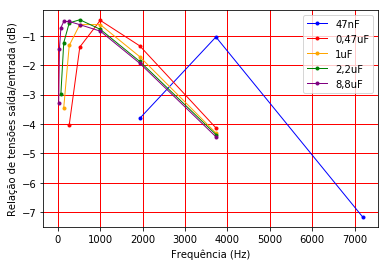

In [9]:
plt.plot( 'frequencia (Hz)', 'T_dB', data=df1, marker='o', markerfacecolor='blue', markersize=3, color='blue', linewidth=1)
plt.plot( 'frequencia (Hz)', 'T_dB', data=df2, marker='o', markerfacecolor='red', markersize=3, color='red', linewidth=1)
plt.plot( 'frequencia (Hz)', 'T_dB', data=df3, marker='o', markerfacecolor='orange', markersize=3, color='orange', linewidth=1)
plt.plot( 'frequencia (Hz)', 'T_dB', data=df4, marker='o', markerfacecolor='green', markersize=3, color='green', linewidth=1)
plt.plot( 'frequencia (Hz)', 'T_dB', data=df5, marker='o', markerfacecolor='purple', markersize=3, color='purple', linewidth=1)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Relação de tensões saída/entrada (dB)')
plt.legend(['47nF','0,47uF','1uF','2,2uF','8,8uF'])
 
plt.savefig('Parte3.png')

In [10]:
ultimo_suspiro = pd.read_csv('dados.csv')

In [11]:
ultimo_suspiro

,C,ressonancia,largura,u_resso,u_largura
0,4.700000e-08,3730,2500,20,20
1,4.700000e-07,1000,2640,20,20
2,1.000000e-06,730,2680,20,20
3,2.200000e-06,550,2730,20,20
4,8.800000e-06,140,2730,20,20


In [12]:
capacitor = ultimo_suspiro['C']
freq = np.sqrt(1/(55.3*0.001*ultimo_suspiro['C']))/(2*np.pi)
variancia = np.sqrt((55.3*0.001*0.05)**2 /(16*np.pi**2 * ultimo_suspiro['C']*(55.3*0.001)**3)+(ultimo_suspiro['C']*0.05)**2/(16*np.pi**2*ultimo_suspiro['C']**3*55.3*0.001))
freq - ultimo_suspiro['ressonancia']
f_teo = []
faixa = []
for i in capacitor:
    f_teo.append(2900)
    faixa.append(200)

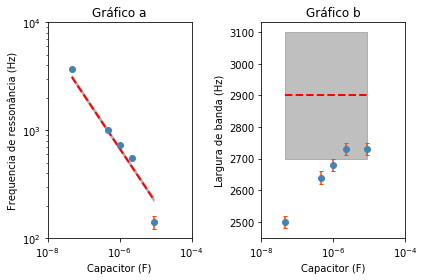

In [13]:
plt.subplot(1,2,1)
plt.errorbar(ultimo_suspiro['C'],ultimo_suspiro['ressonancia'],ultimo_suspiro['u_resso'],fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Capacitor (F)')
plt.ylabel('Frequencia de ressonância (Hz)')
plt.title('Gráfico a')
plt.fill_between(ultimo_suspiro['C'], np.subtract(freq,variancia), np.add(freq,variancia),
                 color='grey', alpha=0.5)
plt.plot(ultimo_suspiro['C'],freq,linestyle='--',linewidth=2,color='red')
plt.xlim([0.00000001,0.0001])
plt.yscale('log')
plt.ylim([100,10000])
plt.subplot(1,2,2)
plt.errorbar(ultimo_suspiro['C'],ultimo_suspiro['largura'],ultimo_suspiro['u_largura'],fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)
plt.xscale('log')
plt.xlabel('Capacitor (F)')
plt.ylabel('Largura de banda (Hz)')
plt.title('Gráfico b')
plt.xlim([0.00000001,0.0001])
plt.plot(capacitor,f_teo,linestyle='--',linewidth=2,color='red')
plt.fill_between(ultimo_suspiro['C'], np.subtract(f_teo,faixa), np.add(f_teo,faixa),
                 color='grey', alpha=0.5)
plt.tight_layout()
plt.savefig('Parte3_2.png')



## Parte 4

* p4_250 vai ser eliminado pois não foi possível encontrar as três frequências fundamentais

In [14]:
p4_250 = pd.read_csv('250 1k a 20k_dados.csv')
p4_500 = pd.read_csv('500 2k a 4k_dados.csv')
p4_1000 = pd.read_csv('1000 1k a 6k_dados.csv')
p4_2000 = pd.read_csv('2000 1k 8k_dados.csv')
p4_4000 = pd.read_csv('4000 500 a 14k_dados.csv')


In [15]:
p4_250 #4:7
#p4_500 #5:15
#p4_1000 #5:14
#p4_2000 #5:13
#p4_4000 #1:15

,frequencia (Hz),Vpp1 (V),Vpp2 (V),fase (Ch2-Ch1) (graus),T,T_dB
0,1000.000000,3.993386,0.319216,84.240021,0.006390,-21.945134
1,1238.598968,4.005673,0.412527,82.304840,0.010606,-19.744463
2,1534.127405,4.066535,0.567451,80.147606,0.019472,-17.105929
3,1900.168621,4.028685,0.816075,74.242310,0.041033,-13.868667
4,2353.546894,3.941759,1.333328,63.619236,0.114418,-9.415062
5,2915.100755,3.637163,2.479518,30.035006,0.464739,-3.327911
6,3610.640788,3.736618,2.179986,-42.758121,0.340369,-4.680502
7,4472.135955,3.980101,1.161815,-68.203758,0.085209,-10.695144
8,5539.182981,4.042106,0.744825,-76.629715,0.033954,-14.691072
9,6860.826326,4.053921,0.517286,-81.369865,0.016282,-17.882897


In [16]:
dado1 = p4_250.iloc[4:7,]
dado2 = p4_500.iloc[5:15,]
dado3 = p4_1000.iloc[5:14,]
dado4 = p4_2000.iloc[5:13,]
dado5 = p4_4000.iloc[1:15,]

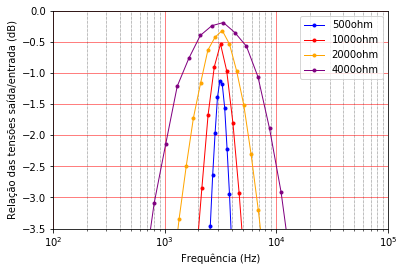

In [17]:
plt.plot( 'frequencia (Hz)', 'T_dB', data=p4_500, marker='o', markerfacecolor='blue', markersize=3, color='blue', linewidth=1)
plt.plot( 'frequencia (Hz)', 'T_dB', data=p4_1000, marker='o', markerfacecolor='red', markersize=3, color='red', linewidth=1)
plt.plot( 'frequencia (Hz)', 'T_dB', data=p4_2000, marker='o', markerfacecolor='orange', markersize=3, color='orange', linewidth=1)
plt.plot( 'frequencia (Hz)', 'T_dB', data=p4_4000, marker='o', markerfacecolor='purple', markersize=3, color='purple', linewidth=1)
plt.grid(which='major',color='r', linestyle='-', linewidth=.5)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='black')
plt.legend(['500ohm','1000ohm','2000ohm','4000ohm'])
plt.ylim([-3.5,0])
plt.xscale('log')
plt.xlim([100,100000])
plt.xlabel('Frequência (Hz)')
plt.ylabel('Relação das tensões saída/entrada (dB)')
plt.savefig('Parte4_metodo')

In [18]:
resul = pd.read_csv('parte4_resul.csv')
resul.columns

Index(['r', 'ressonancia', 'u_resso', 'banda', 'u_banda'], dtype='object')

<ErrorbarContainer object of 3 artists>

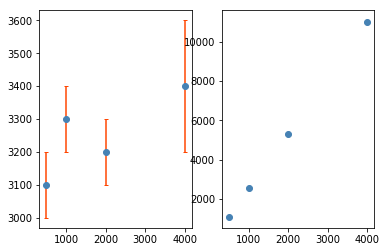

In [19]:
plt.subplot(1,2,1)
#plt.plot( 'r', 'ressonancia',data=resul, marker='o', markerfacecolor='blue', markersize=6, color='blue', linewidth=1)
plt.errorbar(resul['r'],resul['ressonancia'],resul['u_resso'],fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)
plt.subplot(1,2,2)
plt.errorbar(resul['r'],resul['banda'],resul['u_banda'],fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)



In [20]:
# Calculando incertezas
from sympy import *
banda, u_banda, resso, u_resso, C, L, u_C, u_L,R, u_R = symbols('banda u_banda resso u_resso C L u_C u_L R u_R')
f = 1/(2*pi*sqrt(C*L))
u_f = sqrt( diff(f,C)**2 * u_C ** 2 + diff(f,L)**2 * u_L**2 )
valor_u_f = u_f.subs([(u_L,55.3*0.001*0.05),(u_C,47*0.000000001*0.05),(C,47*0.000000001),(L,55.3*0.001)])
print('O valor esperade de ressonancia era de %.8f +- %.8f' %(f.subs([(C,47*0.000000001),(L,55.3*0.001)]),valor_u_f))
Df = R/(2*pi*L)
u_Df = sqrt(diff(Df,R)**2 * u_R**2 + diff(Df,L)**2 * u_L**2)
valor_Df = u_Df.subs([(L,55.3*0.001),(u_L,55.3*0.001*0.05)])
u_f

O valor esperade de ressonancia era de 3121.82559547 +- 110.37320241


sqrt(u_L**2/(16*pi**2*C*L**3) + u_C**2/(16*pi**2*C**3*L))

In [21]:
def delta(R):
    return (0.204375933998018*R**2/(3.141592654)**2 + 81.7503735992074*(0.05*R)**2/(3.141592654)**2)**0.5
def funcao(R,L):
    return R / (2*3.141592654*L)

y = []
dy = []
x = range(400,4100,100)
for i in x:
    y.append(funcao(i,55.3*0.001))
    dy.append(delta(i))

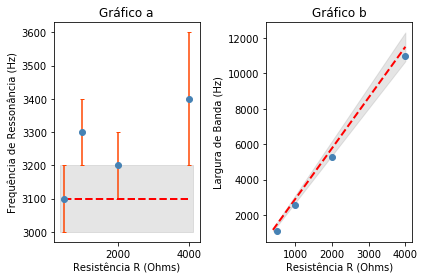

In [22]:
plt.subplot(1,2,1)
plt.errorbar(resul['r'],resul['ressonancia'],resul['u_resso'],fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)
plt.plot([500,4000],[3100,3100],linestyle='--',linewidth=2,color='red')
plt.fill_between([400,4100], 3100 - 100, 3100 + 100,
                 color='gray', alpha=0.2)
plt.xlabel('Resistência R (Ohms)')
plt.ylabel('Frequência de Ressonância (Hz)')
plt.title('Gráfico a')
plt.subplot(1,2,2)
plt.errorbar(resul['r'],resul['banda'],resul['u_banda'],fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)
plt.plot(x,y,linestyle='--',linewidth=2,color='red')
plt.fill_between(x, np.subtract(y,dy), np.add(y,dy),
                 color='gray', alpha=0.2)
plt.xlabel('Resistência R (Ohms)')
plt.ylabel('Largura de Banda (Hz)')
plt.title('Gráfico b')
plt.tight_layout()
plt.savefig('Parte4_final.png')